In [1]:
import csv
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
from scipy import interp

In [2]:
# reading CSV using Pandas and storing in dataframe       
df = pd.read_csv('heartdisease.csv', header = None)

In [3]:
training_x=df.iloc[1:df.shape[0],0:13]
#print(training_set)

training_y=df.iloc[1:df.shape[0],13:14]
#print(testing_set)


# converting dataframe into arrays
x=np.array(training_x)
y=np.array(training_y)




Test Train Split no.  1 





Gaussian Naive Bayes model accuracy(in %): 65.78947368421053




Confusion Matrix
[[39  3  0  0  1]
 [ 3  6  0  2  0]
 [ 1  3  3  2  1]
 [ 0  0  4  2  0]
 [ 0  2  0  4  0]]




F1 Score
0.6488080495356038




ROC Curve


C:\Users\Asus\AppData\Local\Temp\ipykernel_3436\3233816773.py:56: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


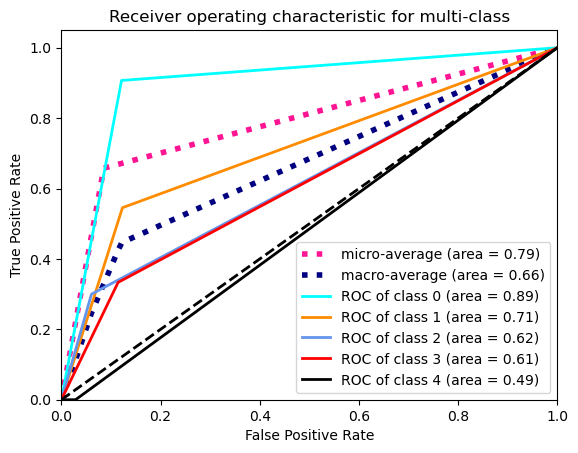

In [5]:

    z=0
    print("\n\n\nTest Train Split no. ",z+1,"\n\n\n")
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=None)
    # Gaussian function of sklearn
    gnb = GaussianNB()
    gnb.fit(x_train, y_train.ravel())
    y_pred = gnb.predict(x_test)
    
    print("\n\nGaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
    
    # convert 2D array to 1D array
    y1=y_test.ravel()
    y_pred1=y_pred.ravel()
    
    print("\n\n\n\nConfusion Matrix")
    cf_matrix=confusion_matrix(y1,y_pred1)
    print(cf_matrix)
    
    print("\n\n\n\nF1 Score")
    f_score=f1_score(y1,y_pred1,average='weighted')
    print(f_score)
    
    # Matrix from 1D array
    y2=np.zeros(shape=(len(y1),5))
    y3=np.zeros(shape=(len(y_pred1),5))
    for i in range(len(y1)):
        y2[i][int(y1[i])]=1
    
    for i in range(len(y_pred1)):
        y3[i][int(y_pred1[i])]=1
     
    
    # ROC Curve generation
    n_classes = 5
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y2[:, i], y3[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y2.ravel(), y3.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # Compute macro-average ROC curve and ROC area
    print("\n\n\n\nROC Curve")
    # First aggregate all false positive rates
    lw=2
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
    # Finally average it and compute AUC
    mean_tpr /= n_classes
    
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)
    
    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
    
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','black'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class')
    plt.legend(loc="lower right")
    plt.show()
    